In [1]:
# arrange an instance segmentation model for test
from sahi.utils.mmdet import (
    download_mmdet_cascade_mask_rcnn_model,
    download_mmdet_config,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

/home/puff/anaconda3/envs/sahi/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = '../models/cascade_mask_rcnn.pth'
download_mmdet_cascade_mask_rcnn_model(model_path)
config_path = download_mmdet_config(model_name="cascade_rcnn", config_file_name="cascade_mask_rcnn_r50_fpn_1x_coco.py",)

/home/puff/anaconda3/envs/sahi/lib/python3.6/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [6]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='mmdet',
    model_path=model_path,
    config_path=config_path,
    confidence_threshold=0.4,
    # image_size=1080,
    device='cuda', # or 'cuda:0'
)

load checkpoint from local path: ../models/cascade_mask_rcnn.pth


In [11]:
slice_size = 128
img_path = '../raw_image/174.jpg'

result = get_sliced_prediction(
    img_path,
    detection_model,
    slice_height = slice_size,
    slice_width = slice_size,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 209 number of slices.


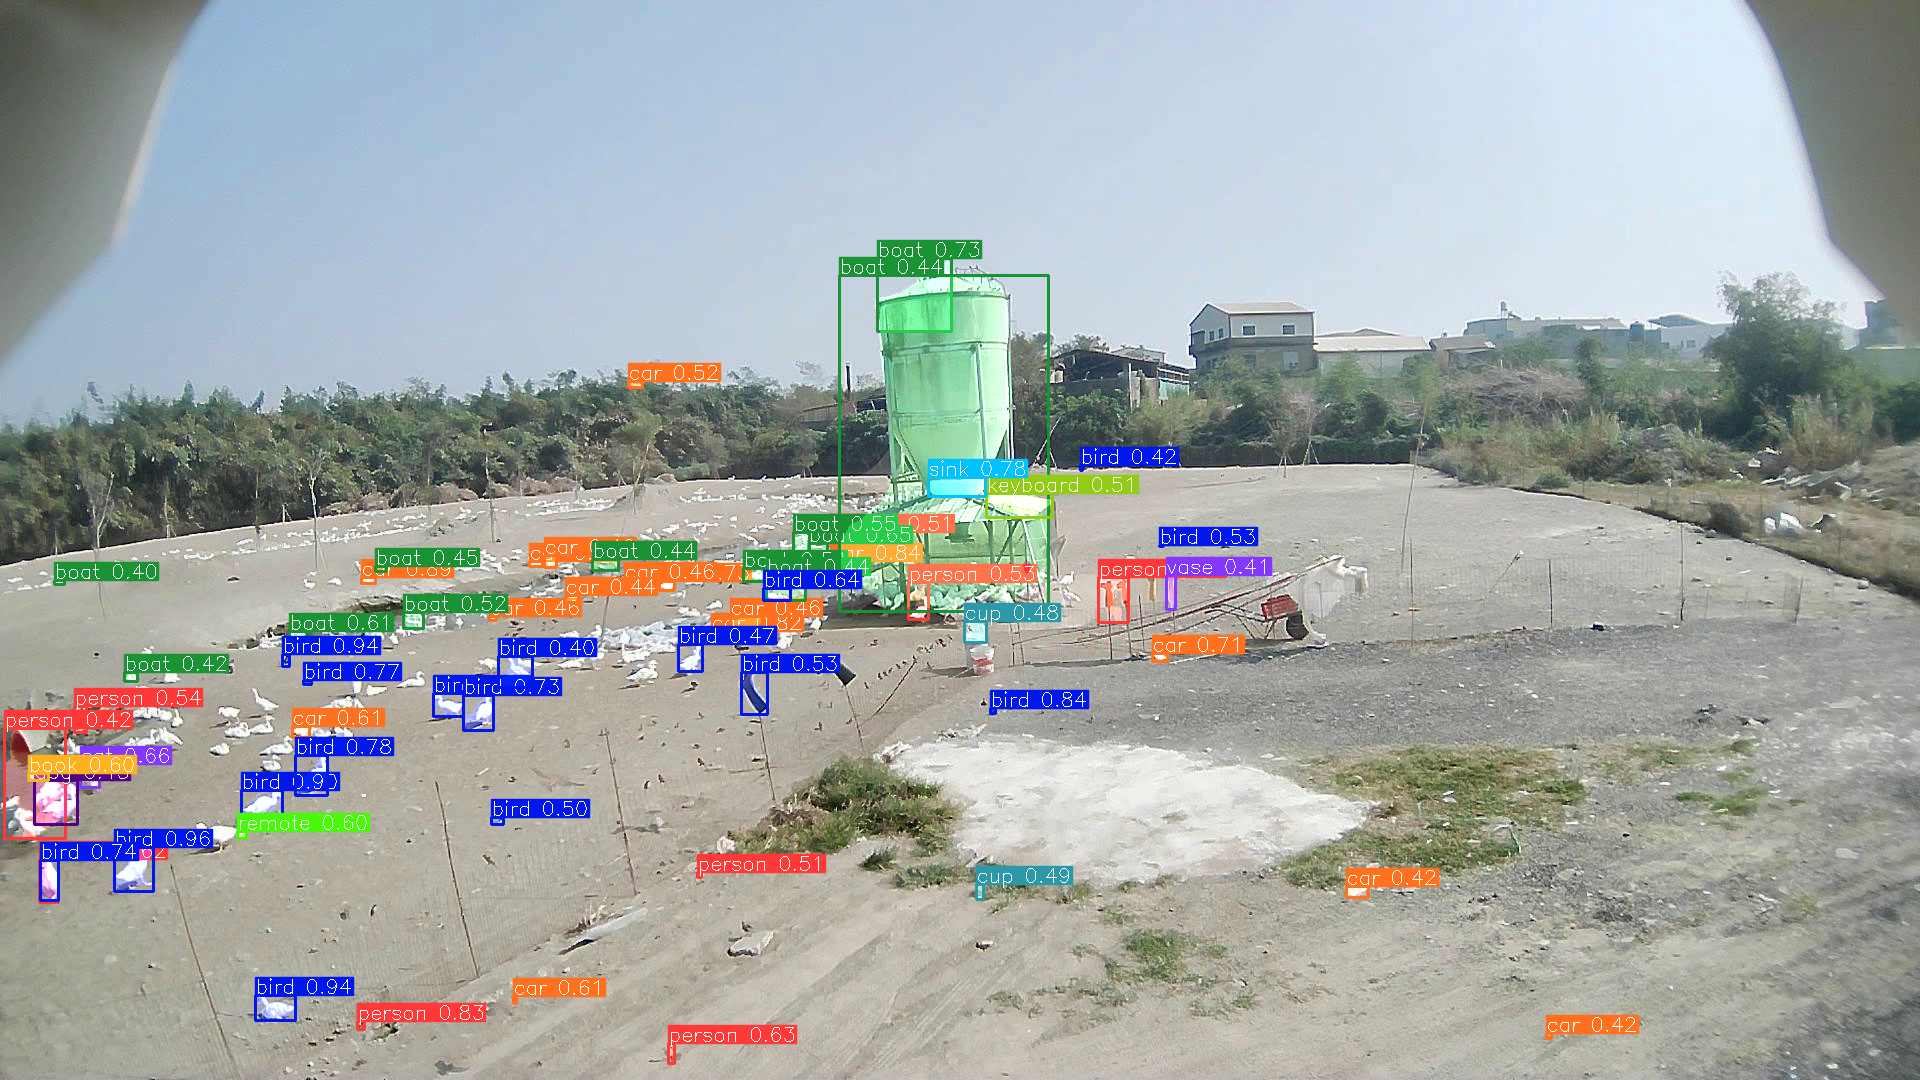

In [12]:
result.export_visuals(export_dir="../demo_data/")

Image("../demo_data/prediction_visual.png")